# Исследование надежности заемщиков


**Описание проекта**
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных**
•	children — количество детей в семье
•	days_employed — общий трудовой стаж в днях
•	dob_years — возраст клиента в годах
•	education — уровень образования клиента
•	education_id — идентификатор уровня образования
•	family_status — семейное положение
•	family_status_id — идентификатор семейного положения
•	gender — пол клиента
•	income_type — тип занятости
•	debt — имел ли задолженность по возврату кредитов
•	total_income — ежемесячный доход
•	purpose — цель получения кредита

**Цель исследования** — ответить на вопросы:

- Есть ли зависимость между наличием детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

**Порядок исследования**

Входные данные от банка — статистика о платёжеспособности клиентов — получены из файла data.csv. Качество предоставляемых данных никто гарантировать не может. Поэтому перед тем, как отвечать на вопрсоы исследования и делать вывод, понадобится обзор данных.

Проверим данные на пропуски, выбросы, дубли и оценим их влияние на исследование. Затем, на этапе предобработки, поищем возможность исправить самые критичные ошибки данных.

После ответа на поставленные цели исследования, сделаем общий вывод.

Таким образом, исследование пройдёт в четыре этапа:

    1) Обзор данных
    2) Предобработка данных
    3) Ответы на вопросы исследования
    4) Общий вывод

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


По полученным данных видно, что:
    - количество столбцов соответствует ожидаемому, 
    - данных очень мало - всего 21525 строк
    - имеем дело с тремя типами данных - float64 (в 2 столбцах), int64 (в 5 столбцах), object (в 5 столбцах)
    - в столбцах days_employed и total_income имеются значения NaN - значения отсутствуют

## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

Данные обработаны - мы избавились от пропусков, дубликатов, аномальных значений, категоризировали данные и привели их к необходимому типу.
Можно приступать к исследованию.

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# Найдём уникальные значения в столбце children
data.children.value_counts()

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

In [23]:
# Создадим столбец children_amount_category, который разобьет количество детей на категории и поместим в него данные 
#при помощи функции map
data['children_amount_category'] = data['children'].map({0 : 'Нет детей', 1 : '1 ребенок', 2 : '2 ребенка', 3 : '3 ребенка', \
                                                         4 : '4 ребенка', 5 : '5 детей'})

In [24]:
# Отсортируем созданный столбец по убыванию
data.groupby('children_amount_category', as_index=False)['children'].count().sort_values('children', ascending=False)

,children_amount_category,children
5,Нет детей,14091
0,1 ребенок,4808
1,2 ребенка,2052
2,3 ребенка,330
3,4 ребенка,41
4,5 детей,9


In [25]:
# Напишем универсальную функцию, которая подсчитает зависимость между различными параметрами и возвратом кредита в срок
def debt_dependense_analysis(data, index):
    # Построим сводную таблицу
    data_pivot = data.pivot_table(index=index, values='debt', aggfunc=['sum', 'count', 'mean']).reset_index()
    
    # Для удобства, переименуем столбцы
    data_pivot = data_pivot.set_axis([index, 'debt_sum', 'count', 'correlation'], axis='columns')
    
    # Возвращаем и сортируем по возрастанию
    return data_pivot.sort_values('correlation')

In [26]:
# Объединим полученные данные и выведем таблицу с ними через универсальную функцию display_data
def display_data(column):
    display(debt_dependense_analysis(data, column) \
            .style.format({'correlation': '{:.2%}'}) 
            .background_gradient(cmap='Reds', subset='correlation'))

In [27]:
# Построим таблицу, которая покажет зависимость между количеством детей и возвратом кредита в срок в процентах
display_data('children_amount_category')

,children_amount_category,debt_sum,count,correlation
4,5 детей,0,9,0.00%
5,Нет детей,1063,14091,7.54%
2,3 ребенка,27,330,8.18%
0,1 ребенок,444,4808,9.23%
1,2 ребенка,194,2052,9.45%
3,4 ребенка,4,41,9.76%


In [28]:
# Напишем универсальную функцию построения диаграммы корелляции данных нам параметров и возврата кредита в срок
def multipurpose_barplot(column, graph_data):
    plt.figure(figsize=(15,6))
    ax = sns.barplot(data = debt_dependense_analysis(data, column), x=column, y='correlation')
    ax.set_title(f'Диаграмма корелляции {graph_data} и возврата кредита в срок', \
                 fontdict= { 'fontsize': 12, 'fontweight':'bold'})
    sns.despine()

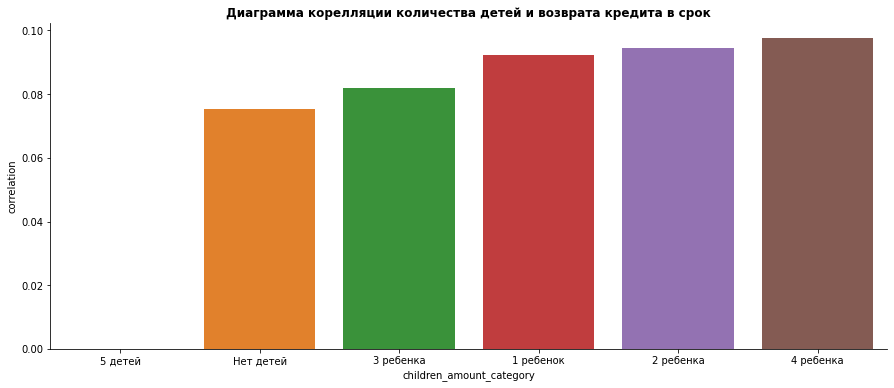

In [29]:
# Построим диаграмму корелляции количества детей и возврата кредита в срок
multipurpose_barplot('children_amount_category', 'количества детей')

**Вывод:**  Видна прямая зависимость между количеством детей и возвратом кредита в срок. Наличие детей повышает вероятность задолжености. Вероятно, это связано с дополнительными расходами на детей. Также возможно представлены данные для одиноких людей с детьми. Так с увеличением количества детей мы видим увеличение количества просроченных задолженностей, особенно в категории от 0 до 2 детей, хотя люди с 3 детьми чаще платят в срок чем люди с 1 ребенком. Это может быть связано либо с тем, что существуют программы поддержки многодетных семей или количество заемщиков в категории "многодетный" для данного сравнения недостаточно и мы не можем сделать по ним корректные выводы. В любом случае, чем больше детей у заемщика, тем меньше у него как действующих, так и погашенных займов. Это утверждение одинаково верно как для «хороших», так и для всех остальных заемщиков. Такие данные содержатся в исследовании аналитического центра микрофинансовой компании «Займер», которым она поделилась с порталом Банки.ру. Бездетные ещё реже пропускают оплату по кредиту, чем люди с детьми. Но это лишь суждение по имеющимся данным. 
Возможно, нужна большая выборка, чтобы принять правильное решение.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [30]:
# Найдём уникальные значения в столбце family_status
data.family_status.value_counts()

женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64

In [31]:
# Для однообразного отображения на графиках приведём сроку family_status к нижнему регистру
data['family_status'] = data['family_status'].str.lower()

In [32]:
# Построим таблицу, которая покажет зависимость между семейным положением и возвратом кредита в срок в процентах
display_data('family_status')

,family_status,debt_sum,count,correlation
1,вдовец / вдова,63,951,6.62%
0,в разводе,84,1189,7.06%
3,женат / замужем,927,12261,7.56%
2,гражданский брак,385,4134,9.31%
4,не женат / не замужем,273,2796,9.76%


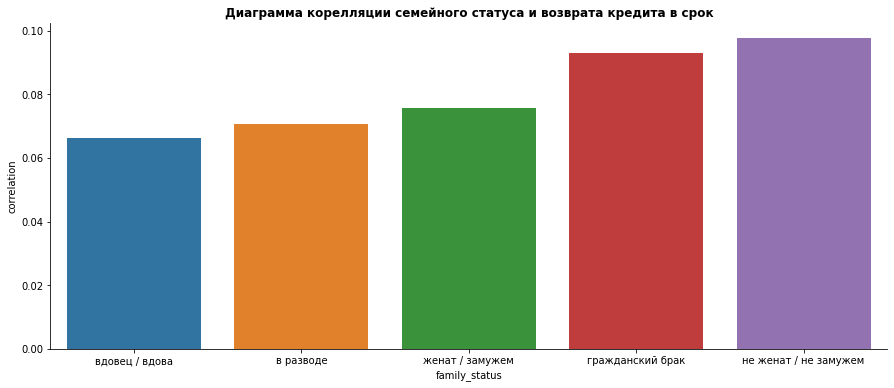

In [33]:
# Построим диаграмму корелляции семейного статуса и возврата кредита в срок
multipurpose_barplot('family_status', 'семейного статуса')

**Вывод:**  Похоже, что люди со статусом Не женат / Не замужем имеют большие шансы на задолженностям по кредитам, что может быть связано с больше свободой действий по распоряжению своими средствами и меньшей ответственностью во время того, когда ты один и нет ни жены/мужа, ни детей. С другой стороны, есть вероятность, что в данных имеется ошибка, ведь не всегда в паспортах стоит печать о браке (причиной тому смена паспорта и человек просто не пошел в загс за печатью). 

Статус Гражданский брак также показывает меньшую ответственность перед кредиторами, так как тут привелирует больше импульсивных трат, нет совместных накоплений по сравнению с семейными парами.

И наоборот, люди в статусе Женат / Замужем, где траты согласованы и более осознанны, показывают большую ответственность перед кредиторами, это может быть связано с тем, что оба супруга управляют бюджетом и потенциальными просрочками по кредитам.

Вдовцы / вдовы же со своей стороны также могут продолжать платить кредит за умершего, иногда кредит может быть непосилен в финансовом плане. Также похороны (как дорогое "мероприятие") и эмоциональный всплеск могут быть причинами просрочек. Однако в этой категории меньше всего просрочек, что может быть причиной того, что страховые берут на себя часть расходов или же остается наследство.

В нашем кейсе однозначно мало данных.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

*Разделим заемщиков на категории, в зависимости от величины дохода:*

0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.

# Напишем функцию, которая подсчитает зависимость между семейным статусом и возвратом кредита в срок
def total_income_vs_debt_dependense_analysis(data, index):
    # Построим сводную таблицу
    data_total_income_pivot = data.pivot_table(index=index, values='debt', aggfunc=['sum', 'count', 'mean']).reset_index()
    
    # Для удобства, переименуем столбцы
    data_total_income_pivot = data_total_income_pivot. \
        set_axis([index, 'debt_sum', 'count_total_income', 'correlation'], axis='columns')
    
    # Возвращаем и сортируем по возрастанию
    return data_total_income_pivot.sort_values('correlation')

In [34]:
# Построим таблицу, которая покажет зависимость между доходом и возвратом кредита в срок в процентах
display_data('total_income_category')

,total_income_category,debt_sum,count,correlation
3,D,21,349,6.02%
1,B,354,5014,7.06%
0,A,2,25,8.00%
2,C,1353,15921,8.50%
4,E,2,22,9.09%


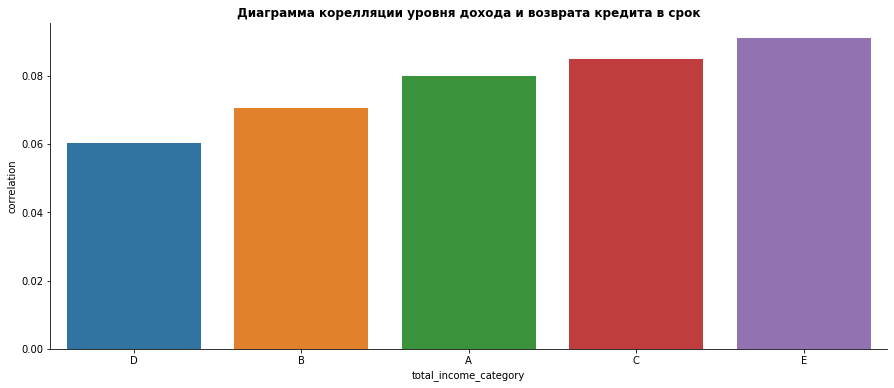

In [35]:
# Построим диаграмму корелляции уровня дохода и возврата кредита в срок
multipurpose_barplot('total_income_category', 'уровня дохода')

**Вывод:**  Напомним разбиение по категориям: 0–30000 — 'E'; 30001–50000 — 'D'; 50001–200000 — 'C'; 200001–1000000 — 'B'; 1000001 и выше — 'A'.

По категориям А и Е сложно сделать выводы, так как тут маленькая выборка. Здесь либо недостаточно данных, либо люди из данных категорий практически не берут кредиты или они их быстро закрывают и без просрочек.

То же самое можно сказать и о категории D - у неё минимальный процент просрочек в оставшихся трех группах. Однако это может быть связано и с малым количеством кредитов, так как доход небольшой, а разбросс сумм в группе всего 20000.

Остаются группы В и С. Если судить по ним, то с увеличением дохода снижается и риск просрочки. 
Возможно дробление на большее количество групп выявило бы более плавную корреляцию, однако изначальный набор данных мал и маловероятно, что это бы помогло. Необходима большая выборка.

Но в общем и целом данные показывают, что с уровнем дохода снижается и процент должников.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [36]:
# Найдём уникальные значения в столбце purpose_category
data.purpose_category.value_counts()

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

In [37]:
# Построим таблицу, которая покажет зависимость между целью кредита и возвратом кредита в срок в процентах
display_data('purpose_category')

,purpose_category,debt_sum,count,correlation
1,операции с недвижимостью,780,10751,7.26%
3,проведение свадьбы,183,2313,7.91%
2,получение образования,369,3988,9.25%
0,операции с автомобилем,400,4279,9.35%


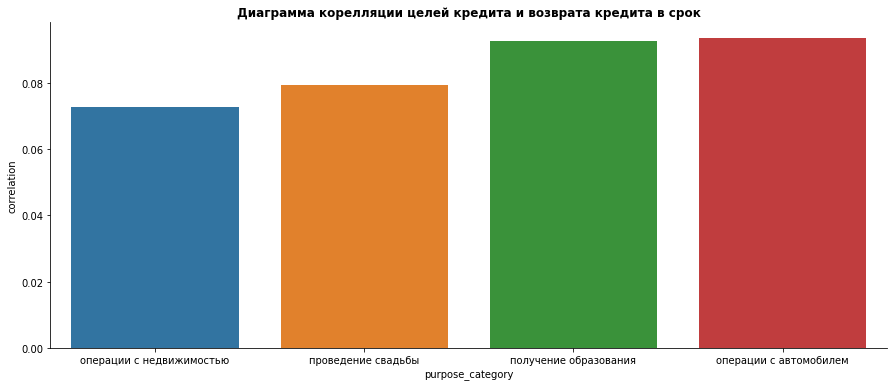

In [38]:
# Построим диаграмму корелляции целей кредита и возврата кредита в срок
multipurpose_barplot('purpose_category', 'целей кредита')

**Вывод:** По графикам видно, что кредиты на автомобили больше всего подвержены риску невозврата. Причиной могут быть как "серые схемы" продаж автомобилей, так и аварийные ситуации, увеличивающие затраты заёмщиков.

Категория кредитов на образования также является высокорисковой. Такие кредиты часто берут студенты с минимальным заработком или люди без работы для переквалификации и начала работы.

Кредиты на свадьбы подвержены риску невозврата меньше, чем первые две категории, но всё равно не относятся к категории с минимальным риском. Это может быть связано с тем, что кредит на свадьбу предполагает высокий процент по кредиту и высокую сумму задолженности на краткий период времени, а также с тем, что нередки случаи разводов после свадьбы в сроки меньшие, чем срок самого кредита.

Операции с недвижимостью наименее рисковые и в большинстве из случаев связаны с ипотечным кредитом, а следовательно тут имеют место быть ряд государственных льгот в виде материнского капитала и сниженные проценты от застройщиков, более низкие ставки самих кредитов в банках, а также большая подготовленность граждан к взятию такого кредита (первоначальный взнос). Граждане, которые берут кредит для проведения операций с недвижимостью более отвественно подходят к его погашению, так как это место где они и их семьи будут жить.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Причинами могут быть: неверный ввод данных (как ручной и машинописный), сокрытие информации (например, как говорилось в примере выше, не всегда банковский служащий одназначно знает был ли человек замужем/женат, так как не во всех новых паспортах ставят печати о браках сами брачующие или сами клиенты намеренно могут сокрыть какие-либо данные), множественные манипуляции с данными, присвоение пропускам специальной категории, разные годы заполнения данных, а соответственно и требования к заполнению, отличные способы оформления данных - человеческий фактор; повреждение файла данных при сохранении/передаче/объединении/загрузки/выгрузки данных, технические проблемы - технический фактор. Выбросы, пропуски и дубликаты в исходных данных являются причиной их искажения.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Потому что Медиана игнорирует или же сглаживает случайные или не случайные выбросы, шум и катаклизмы в целом. И если данные имеют нормальное распределение и их количество велико, то медиана будет равняться среднему значению. 

### Шаг 4. Общий вывод.

**В данном проекте исследования надёжности заёмщиков, после первоначальной обработки данных выявлены следующие моменты:**
 1) В процессе обработки данных по проекту мы избавились от пропусков, дубликатов, аномальных значений, категоризировали данные и привели их к необходимому типу;
 
 2) Причинами неверных исходных данных могут быть как человеческий фактов, так и технический;
 
 3) Медиана - лучший выбор для заполнения пропусков для количественных переменных из-за устойчивости к выбросам и аномальным значениям;
 
 4) При исследовании данных были выявлены следующие зависимости:
    - Бездетные семьи реже пропускают оплату по кредиту и доводят до просрочек. Соответственно наличие детей увеличивает вероятность задолженности;
 
    - Семейные пары подходят к вопросу кредитов более ответственно. С другой стороны холостые люди более подвержены риску просрочить кредит;
 
    - С увеличением дохода уменьшается и вероятность стать должником. А категория граждан с доходом с 50000 до 200000 по данным проекта является наиболее рисковой категорией;
 
    - Больше всего просрочек по кредитам наблюдается в категориях образование и автомобили. Кредиты же, связанные с жильем, возвращают вовремя чаще остальных;
    
  5) На основании вышеописанного выстраиваются такие портреты заёмщиков:
  
      А) Рисковый заёмщик (как сам заёмщик, так и объединение с целью кредита):
      
          - одинок (в статусе Не женат / Не замуже / В гражданском браке)
          - берёт высокорисковый кредит (на образование или транспорт)
          - имеет 1 и более детей
          - зарабатывает до 200000
      
      В) Надёжный заёмщик:
      
          - состоит в браке
          - берёт малорисковые кредиты осознанно (ипотечные кредиты)
          - не имеет детей
          - зарабатывает более 200000
          
   6) **Рекомендации заказчику**: Выше описаны выводы, сделанные на полученных данных. Предполагается, что данных недостаточно для полноценного анализа. Но общепринятые критерии и пункты оценки заёмщиков можно описать так:
   
   - внимательнее принимать документы от заёмщиков и заполнять данные;
   - обязательно требовать первоначальный взнос при сумме кредита равной сумме нескольких месяцев дохода заёмщика и если кредит берётся на материальные нужды (жильё, транспорт) или же подтверждающий документ о принятии бывшим собственником объекта кредитования первоначального взноза, что также укажет на платежеспособность и серьёзность намерений заёмщика;
   - учитывать нынешнюю и возможную в будущем годовую ставку по кредиту в перспективе нескольких месяцев, чтобы кредитор не оказался в убытке;
   - предлагать увеличенный срок кредита (с лимитом возраста кредита до пенсионного возраста);
   - рассчитывать ежемесячный платеж по кредиту не более 40% от дохода заёмщика;
   - всесторонее проверять заёмщика на кредитоспособность и прочие пункты, указанные ниже:
   
       а) запросить анкету заявления на кредит у заёмщика для дальнейшего сравнения поданной им информации на разных этапах проверок;
       
       б) платежеспособность оценивают по активам гражданина: его свободным деньгам на счетах, имуществе, дополнительных доходах;
       
       в) наименее рисковая группа - семейная пара или заёмщик плюс хотя бы созаёмщик (обычно 1-3 человека);
       
       г) обязательная проверка заёмщика и созаёмщиков через БКИ и в отношении постановки на учёт в любом органе (наркодиспансер, МВД и тд);
       
       д) просить взять заёмщика страховку на случай неуплаты / проблем со здоровьем / лишением жизни или объекта кредита;
       
       е) провести скоринговую оценку (автоматизированная система оценки клиента);
       
       ж) проверить наличие текущих кредитов / кредитных карт / обременений на имущество и прочее;
       
       з) учесть дополнительные комиссии (проценты риэлтору, диллеру, оценщику, дополнительные траты в ближайшем будущем);
       
       и) брать в рассчёт, что рассчитывать на меньшую ставку сможет тот, кто является зарплатным клиентом банка в котором планируется оформление кредита, если это предполагает политика кредитора;
       
       к) часто для сотрудников партнерских организаций банка тоже предусмотрены сниженные ставки процента;
       
       л) непосредственно влияет на величину ставки тип кредита (с поручителем, без обеспечения, с обеспечением), чем больше у банка гарантий, тем ниже ставка.
       
Если учесть все вышеописанные пункты, то риск займа рисковой группе заёмщиков уменьшится многократно.